### Introduction to K-Nearest Neighbors (KNN) 

The K-Nearest Neighbors (KNN) algorithm is very simple and very effective.The k-Nearest Neighbors (kNN) algorithm is arguably the simplest machine learning
algorithm. Building the model only consists of storing the training dataset. 

#### Making Predictions with KNN

KNN makes predictions using the training dataset directly. Predictions are made for a new
data point by searching through the entire training set for the K most similar instances (the
neighbors) and summarizing the output variable for those K instances. For regression this might
be the mean output variable, in classification this might be the mode (or most common) class
value.

To determine which of the K instances in the training dataset are most similar to a new
input a distance measure is used. For real-valued input variables, the most popular distance
measure is Euclidean distance. Euclidean distance is calculated as the square root of the sum of
the squared differences between a point a and point b across all input attributes i.

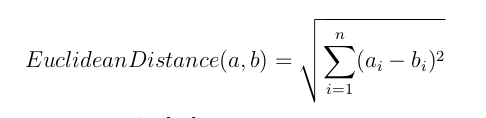

There are many other distance measures that can be used, such as Tanimoto, Jaccard,
Mahalanobis and cosine distance. You can choose the best distance metric based on the
properties of your data. If you are unsure, you can experiment with different distance metrics
and different values of K together and see which mix results in the most accurate models.
Euclidean is a good distance measure to use if the input variables are similar in type (e.g.
all measured widths and heights). Manhattan distance is a good measure to use if the input
variables are not similar in type (such as age, gender, height, etc.).

The value for K can be found by algorithm tuning. It is a good idea to try many different
values for K (e.g. values from 1 to 21) and see what works best for your problem. The
computational complexity of KNN increases with the size of the training dataset. For very large
training sets, KNN can be made stochastic by taking a sample from the training dataset from
which to calculate the K-most similar instances. KNN can be used for regression and classification problems.

##### When KNN is used for regression problems the prediction is based on the mean or the median of the K-most similar instances.

##### When KNN is used for classification, the output can be calculated as the class with the highest frequency from the K-most similar instances.

#### Curse of Dimensionality

KNN works well with a small number of input variables (p), but struggles when the number
of inputs is very large. Each input variable can be considered a dimension of a p-dimensional
input space. For example, if you had two input variables X1 and X2, the input space would be
2-dimensional. As the number of dimensions increases the volume of the input space increases
at an exponential rate. In high dimensions, points that may be similar may have very large
distances. All points will be far away from each other and our intuition for distances in simple
2 and 3-dimensional spaces breaks down. This might feel unintuitive at first, but this general
problem is called the Curse of Dimensionality.

#### Preparing Data For KNN

1. Rescale Data: KNN performs much better if all of the data has the same scale. Normal-
izing your data to the range between 0 and 1 is a good idea. It may also be a good idea
to standardize your data if it has a Gaussian distribution.

2. Address Missing Data: Missing data will mean that the distance between samples
cannot be calculated. These samples could be excluded or the missing values could be
imputed.

3. Lower Dimensionality: KNN is suited for lower dimensional data. You can try it on
high dimensional data (hundreds or thousands of input variables) but be aware that it
may not perform as well as other techniques. KNN can benefit from feature selection that
reduces the dimensionality of the input feature space.

#### KNN Tutorial

#####  KNN from Scratch

In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
data_2C = pd.read_csv("column_2C_weka.csv")

In [3]:
data_2C.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [4]:
data_2C.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
pelvic_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
pelvic_tilt numeric,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
lumbar_lordosis_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
sacral_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
pelvic_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
degree_spondylolisthesis,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082


In [5]:
data_2C.dtypes

pelvic_incidence            float64
pelvic_tilt numeric         float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

In [6]:
#features columns
colnames_numeric = data_2C.columns[0:6]

In [7]:
colnames_numeric

Index(['pelvic_incidence', 'pelvic_tilt numeric', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis'],
      dtype='object')

In [8]:
#Scaling a data in always a good idea while using KNN
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_2C[colnames_numeric] = scaler.fit_transform(data_2C[colnames_numeric])

In [9]:
# X_scaled = scale * X + min - X.min(axis=0) * scale
# where scale = (max - min) / (X.max(axis=0) - X.min(axis=0))

In [10]:
data_2C.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,0.355688,0.519900,0.229180,0.250857,0.307461,0.025148,Abnormal
1,0.124501,0.296783,0.098578,0.144629,0.476649,0.036365,Abnormal
2,0.411666,0.513932,0.322995,0.307661,0.386097,0.017523,Abnormal
3,0.416151,0.557414,0.271260,0.289436,0.341826,0.051838,Abnormal
4,0.227272,0.289479,0.128129,0.247022,0.409579,0.044173,Abnormal


In [11]:
data_2C.shape

(310, 7)

In [12]:
df = data_2C.values.tolist()
df

[[0.3556878816384217,
  0.5198998354211468,
  0.22917997405738216,
  0.25085730007495866,
  0.30746116406185287,
  0.025148386796833937,
  'Abnormal'],
 [0.1245010390093278,
  0.29678310371966715,
  0.09857833418098988,
  0.1446293515280553,
  0.47664890731280163,
  0.03636497080423512,
  'Abnormal'],
 [0.4116664786323362,
  0.5139322886296582,
  0.3229946578328597,
  0.30766053650983116,
  0.38609692495620795,
  0.017522903291025245,
  'Abnormal'],
 [0.4161510431394515,
  0.5574138832291958,
  0.27125998782261546,
  0.2894358396770871,
  0.34182648376044333,
  0.051838074359006905,
  'Abnormal'],
 [0.2272718673829266,
  0.28947930168523267,
  0.12812869472882338,
  0.24702205146767156,
  0.4095792932797552,
  0.04417277370515321,
  'Abnormal'],
 [0.1360093171599781,
  0.36574425681505934,
  0.09955890551486393,
  0.11994305360029678,
  0.6478792399181693,
  0.03093294085192153,
  'Abnormal'],
 [0.2631500431605651,
  0.4004386691677185,
  0.20731554786791268,
  0.2239595707840731,
  0.

In [13]:
#Breaking the data into training and test set
import random
def train_test_split(data, split, trainingSet = [], testSet = []):
    for x in range(len(data)):
        if random.random() < split:
            trainingSet.append(data[x])
        else:
            testSet.append(data[x])

In [14]:
trainingSet = []
testSet = []
split = 0.66
train_test_split(df, split, trainingSet, testSet)

In [15]:
len(trainingSet)

202

In [16]:
trainingSet = trainingSet[:5]

In [17]:
len(testSet)

108

In [18]:
#Define Euclidean distances
import math
def Euclideandist(x,xi, length):
    d = 0.0
    for i in range(length):
        d += pow(float(x[i])- float(xi[i]),2)
    return math.sqrt(d)

In [19]:
#Getting the K neighbours having the closest Euclidean distance to the test instance
import operator
def getNeighbors(trainingSet, testInstance, k):
    distances = []
    length = len(testInstance)-1
    for x in range(len(trainingSet)):
        dist = Euclideandist(testInstance, trainingSet[x], length)
        distances.append((trainingSet[x], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

In [20]:
#After sorting the neighbours based on their respective classes, max voting to give the final class of the test instance
import operator
def getResponse(neighbors):
    classVotes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)#Sorting it based on votes
    return sortedVotes[0][0] #Please note we need the class for the top voted class, hence [0][0]#

In [21]:
#Getting the accuracy
def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x][-1] == predictions[x]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0

In [26]:
predictions=[]
k = 2
neighbors = getNeighbors(trainingSet, testSet[0], k)
print(neighbors)
result = getResponse(neighbors)
# result
predictions.append(result)
predictions

[[0.18535588331531994, 0.3091899534016523, 0.1345805254891395, 0.19659164797951825, 0.5074553313169391, 0.0008899131937454424, 'Abnormal'], [0.2272718673829266, 0.28947930168523267, 0.12812869472882338, 0.24702205146767156, 0.4095792932797552, 0.04417277370515321, 'Abnormal']]


['Abnormal']

In [23]:
# generate predictions
predictions=[]
k = 3
for x in range(len(testSet)):
    neighbors = getNeighbors(trainingSet, testSet[x], k)
    result = getResponse(neighbors)
    predictions.append(result)
    print('> predicted=' + repr(result) + ', actual=' + repr(testSet[x][-1]))

> predicted='Abnormal', actual='Abnormal'
> predicted='Abnormal', actual='Abnormal'
> predicted='Abnormal', actual='Abnormal'
> predicted='Abnormal', actual='Abnormal'
> predicted='Abnormal', actual='Abnormal'
> predicted='Abnormal', actual='Abnormal'
> predicted='Abnormal', actual='Abnormal'
> predicted='Abnormal', actual='Abnormal'
> predicted='Abnormal', actual='Abnormal'
> predicted='Abnormal', actual='Abnormal'
> predicted='Abnormal', actual='Abnormal'
> predicted='Abnormal', actual='Abnormal'
> predicted='Abnormal', actual='Abnormal'
> predicted='Abnormal', actual='Abnormal'
> predicted='Abnormal', actual='Abnormal'
> predicted='Abnormal', actual='Abnormal'
> predicted='Abnormal', actual='Abnormal'
> predicted='Abnormal', actual='Abnormal'
> predicted='Abnormal', actual='Abnormal'
> predicted='Abnormal', actual='Abnormal'
> predicted='Abnormal', actual='Abnormal'
> predicted='Abnormal', actual='Abnormal'
> predicted='Abnormal', actual='Abnormal'
> predicted='Abnormal', actual='Ab

In [24]:
accuracy = getAccuracy(testSet, predictions)
print('Accuracy: ' + repr(accuracy) + '%')

Accuracy: 73.14814814814815%


##### Implementing KNN using scikitlearn

In [27]:
import pandas as pd
import numpy as np
import os

In [28]:
df = pd.read_csv('column_2C_weka.csv')

In [29]:
df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [30]:
df.shape

(310, 7)

In [31]:
numeric_cols = df.columns[0:6]

In [32]:
#Scaling a data in always a good idea while using KNN
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [33]:
df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,0.355688,0.519900,0.229180,0.250857,0.307461,0.025148,Abnormal
1,0.124501,0.296783,0.098578,0.144629,0.476649,0.036365,Abnormal
2,0.411666,0.513932,0.322995,0.307661,0.386097,0.017523,Abnormal
3,0.416151,0.557414,0.271260,0.289436,0.341826,0.051838,Abnormal
4,0.227272,0.289479,0.128129,0.247022,0.409579,0.044173,Abnormal


In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[numeric_cols], df['class'], random_state = 0)

In [35]:
X_test.shape

(78, 6)

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,y_train)
prediction = knn.predict(X_test)
# print('Prediction: {}'.format(prediction))
# print(prediction)
print('With KNN (K=3) accuracy is: ',knn.score(X_test,y_test)) # accuracy

With KNN (K=3) accuracy is:  0.7564102564102564


In [70]:
y_test

300      Normal
145    Abnormal
302      Normal
222      Normal
52     Abnormal
279      Normal
22     Abnormal
171    Abnormal
191    Abnormal
245      Normal
150    Abnormal
64     Abnormal
281      Normal
166    Abnormal
74     Abnormal
152    Abnormal
263      Normal
134    Abnormal
226      Normal
238      Normal
7      Abnormal
258      Normal
15     Abnormal
92     Abnormal
190    Abnormal
26     Abnormal
12     Abnormal
255      Normal
224      Normal
90     Abnormal
         ...   
144    Abnormal
55     Abnormal
237      Normal
146    Abnormal
246      Normal
179    Abnormal
209    Abnormal
5      Abnormal
63     Abnormal
200    Abnormal
59     Abnormal
34     Abnormal
269      Normal
33     Abnormal
21     Abnormal
101    Abnormal
235      Normal
45     Abnormal
89     Abnormal
158    Abnormal
164    Abnormal
129    Abnormal
262      Normal
184    Abnormal
215      Normal
157    Abnormal
252      Normal
188    Abnormal
73     Abnormal
303      Normal
Name: class, Length: 78,